In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
results = pd.read_csv(
    './../../../data_source/results/boosting/50evals_50reps_boosting_dfs.csv',
    index_col=0
)
results.head()

,exp_id,experiment_id,memory,steps,VarianceThreshold,StandardScaler,LightGBM,VarianceThreshold__threshold,StandardScaler__copy,StandardScaler__with_mean,...,XGBoosting__reg_lambda,XGBoosting__scale_pos_weight,XGBoosting__seed,XGBoosting__silent,XGBoosting__subsample,XGBoosting__tree_method,XGBoosting__eval_metric,XGBoosting__max_bin,XGBoosting__min_split_loss,exp_duration
0,44,LightGBM,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","LightGBM(boosting_type='gbdt', class_weight='b...",0.0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,LightGBM,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","LightGBM(boosting_type='gbdt', class_weight='b...",0.0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,LightGBM,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","LightGBM(boosting_type='gbdt', class_weight='b...",0.0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,LightGBM,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","LightGBM(boosting_type='gbdt', class_weight='b...",0.0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,LightGBM,NaN,"(('VarianceThreshold', VarianceThreshold(thres...",VarianceThreshold(threshold=0.0),"StandardScaler(copy=True, with_mean=True, with...","LightGBM(boosting_type='gbdt', class_weight='b...",0.0,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
results.shape

(100, 66)

In [4]:
model_grps = results.groupby('experiment_id')
gbm_val, xg_val = model_grps['test_score'].mean()
gbm_val, xg_val = np.round(gbm_val, 2), np.round(xg_val, 2)
gbm_train, xg_train = model_grps['train_score'].mean()
gbm_train, xg_train = np.round(gbm_train, 2), np.round(xg_train, 2)

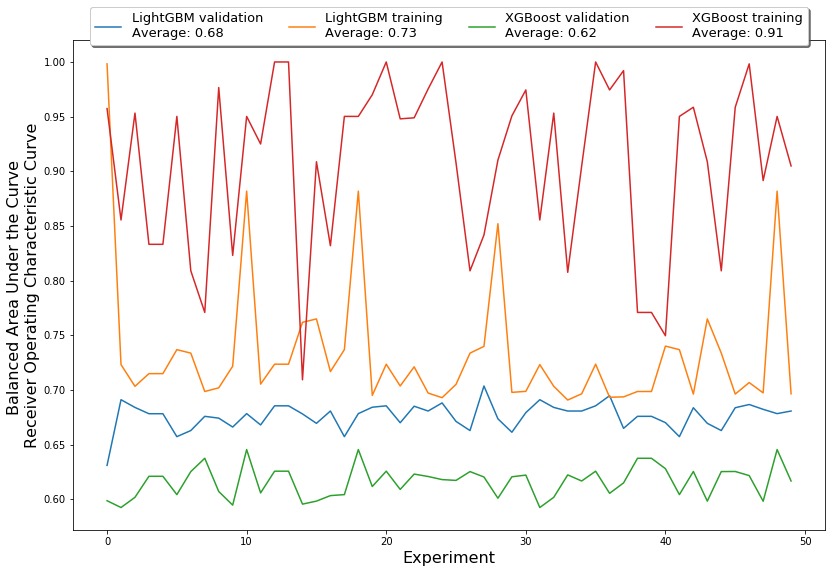

In [5]:
test_results = {}
train_results = {}
for name, result in model_grps:
    test_results[name] = result['test_score']
    train_results[name] = result['train_score']
    
x_coords = np.arange(50)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
axes.plot(x_coords, test_results['LightGBM'], '-', label=f'LightGBM validation\nAverage: {gbm_val}')
axes.plot(x_coords, train_results['LightGBM'], '-', label=f'LightGBM training\nAverage: {gbm_train}')
axes.plot(x_coords, test_results['XGBoosting'], '-', label=f'XGBoost validation\nAverage: {xg_val}')
axes.plot(x_coords, train_results['XGBoosting'], '-', label=f'XGBoost training\nAverage: {xg_train}')
plt.ylabel('Balanced Area Under the Curve \nReceiver Operating Characteristic Curve', fontsize=16)
plt.xlabel('Experiment', fontsize=16)
legend1 = plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, 1.08),
    #loc='center left', 
    #bbox_to_anchor=(1, 0.5),
    ncol=4, 
    fontsize=13,
    fancybox=True, 
    shadow=True
)
axes.add_artist(legend1)
#axes.add_artist(legend2)
plt.tight_layout()
plt.savefig(
    './../../../figures/train_test_boosting.png',
    bbox_inches='tight',
    transparent=True,
    dpi=600, 
)